### Catalog of model globular clusters in the Milky Way

This is a mock catalog of Galactic globular clusters calculated with a model for the formation and evolution of globular cluster systems. Current version of the model published in [Chen & Gnedin (2022)](https://arxiv.org/abs/2203.00599). It is based on earlier versions developed in [Muratov & Gnedin (2010)](https://ui.adsabs.harvard.edu/abs/2010ApJ...718.1266M/abstract), [Li & Gnedin (2014)](https://ui.adsabs.harvard.edu/abs/2014ApJ...796...10L/abstract), [Choksi et al. 2018](https://ui.adsabs.harvard.edu/abs/2018MNRAS.480.2343C/abstract),
[Choksi & Gnedin 2019a](https://ui.adsabs.harvard.edu/abs/2019MNRAS.486..331C/abstract),
[Choksi & Gnedin 2019b](https://ui.adsabs.harvard.edu/abs/2019MNRAS.488.5409C/abstract).

The model matches the observed mass function and age-metallicity distribution of the Galactic globular clusters. Current version of the model adds information on the spatial and kinematic distributions of the globular cluster system, based on tagging particles from the [Illustris TNG50 simulation](https://www.tng-project.org/data/downloads/TNG50-1/). It matches the observed surface number density profile and the velocity dispersion profile of the Galactic globular clusters.

The catalog of clusters survived to redshift z=0 provides information on cluster age, mass at formation and at z=0, Cartesian coordinates and velocities at z=0, orbital actions in the best-fitting halo+disk Galactic potential, apocenter and pericenter radii, value of the potential, cluster iron metallicity, total and stellar mass of host galaxy at formation, and total and stellar mass of host galaxy at z=0. The catalog also contains a tag `origin` to mark clusters formed in the central halo (in-situ) and in satellite galaxies (ex-situ), and gives the time of accretion for ex-situ clusters.

The catalog of disrupted clusters contains also the time of disruption. The coordinates and other orbital information is for the center of mass of the resulting stellar stream.

Both catalogs contain GC systems of 3 halos most resembling the Milky Way in their growth of dark matter and stellar mass. Each halo provides an alternative possible history of the assembly of the MW system of globular clusters. GC systems can be analyzed combined for all 3 halos, or for each halo separately. The adjustable model parameters are tuned to match the MW system and are slightly different from the version published in [Chen & Gnedin (2022)](https://arxiv.org/abs/2203.00599): $p_2 = 4$, $\kappa_\lambda = 3$.

This notebook provides examples of reading the cluster catalog and making a plot for the mass-metallicity relation.

The format of the catalog files:

In [1]:
dtype = {
    'names': (
        'halo_id',        # host galaxy halo ID
        't_form',         # formation time (lookback, Gyr)
        't_disrupt',      # disrupt time (lookback, Gyr), -1 for surviving clusters
        't_accrete',      # accreted time (lookback, Gyr), -1 for in-situ clusters
        'log_m_form',     # log of GC mass at formation (Msun)
        'log_m_gc',       # log of GC mass at z=0 (Msun), -1 for disrupted clusters
        'x', 'y', 'z',    # Cartesian coordinates at z=0 (kpc), with z the main axis
        'vx', 'vy', 'vz', # Cartesian velocities at z=0 (km/s)
        'Jr', 'Jz', 'Jp', # actions at z=0 (kpc km/s)
        'rapo', 'rperi',  # apo-center and peri-center radii at z=0 (kpc)
        'Ep',             # potential at z=0 (km^2/s^2), approximated by multipole expansion
        'feh',            # metallicity [Fe/H]
        'origin',         # original leaf galaxy ID, -1 for in-situ clusters 
        'parttype',       # partical type of this GC (0:DM; 1&2:star)
        'log_mh_form',    # log of galaxy halo mass at formation (Msun)
        'log_ms_form',    # log of galaxy stellar mass at formation (Msun), from Behroozi+13
        'log_mh',         # log of galaxy halo mass at z=0 (Msun)
        'log_ms',         # log of galaxy stellar mass at z=0 (Msun), from Behroozi+13
        'log_ms_k18'      # log of galaxy stellar mass at z=0 (Msun), from Kravtsov+18
    ),  
    'formats': (
        'i8', 'f8', 'f8', 'f8', 
        'f8', 'f8', 
        'f8', 'f8', 'f8', 
        'f8', 'f8', 'f8', 
        'f8', 'f8', 'f8', 
        'f8', 'f8', 'f8', 
        'f8', 'i8', 'i8', 
        'f8', 'f8', 
        'f8', 'f8', 'f8')}

Load the catalog of clusters survived until z=0 and expected to be detectable as globular clusters:

In [2]:
import numpy as np

data_s = np.loadtxt('mw_like_4.0_0.5_lambda_survive.txt', dtype=dtype)

Load the catalog of clusters fully disrupted before z=0 and expected to be detectable as stellar streams:

In [3]:
data_d = np.loadtxt('mw_like_4.0_0.5_lambda_disrupt.txt', dtype=dtype)

Both catalogs contain GC systems of 3 halos most resembling the Milky Way in their growth of dark matter and stellar mass. The identifiers of these halos in the TNG50 halo list at z=0 are ID = 506151, 458470, 450916. The total halo mass and the stellar mass of these halos (in solar masses) at z=0 are printed below. Stellar mass can be calculated either from the [Universe Machine, Behroozi et al. 2013](https://www.peterbehroozi.com/data.html) `(B13)` or from [Kravtsov et al. 2018](https://ui.adsabs.harvard.edu/abs/2018AstL...44....8K/abstract) `(K18)`. The former may be an underestimate, the latter may be an overestimate.

In [4]:
for hid in [ 506151, 458470, 450916 ]:
    print('hid=', hid,\
          'log Mhalo=', data_s['log_mh'][data_s['halo_id']==hid][0],\
          'log Mstellar(B13)=', data_s['log_ms'][data_s['halo_id']==hid][0],\
          'log Mstellar(K18)=', data_s['log_ms_k18'][data_s['halo_id']==hid][0])

hid= 506151 log Mhalo= 12.171 log Mstellar(B13)= 10.571 log Mstellar(K18)= 10.76
hid= 458470 log Mhalo= 12.383 log Mstellar(B13)= 10.705 log Mstellar(K18)= 10.922
hid= 450916 log Mhalo= 12.418 log Mstellar(B13)= 10.724 log Mstellar(K18)= 10.946


Example below plots the GC mass at z=0 vs. metallicity for halo 506151.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('mplstyle.txt')

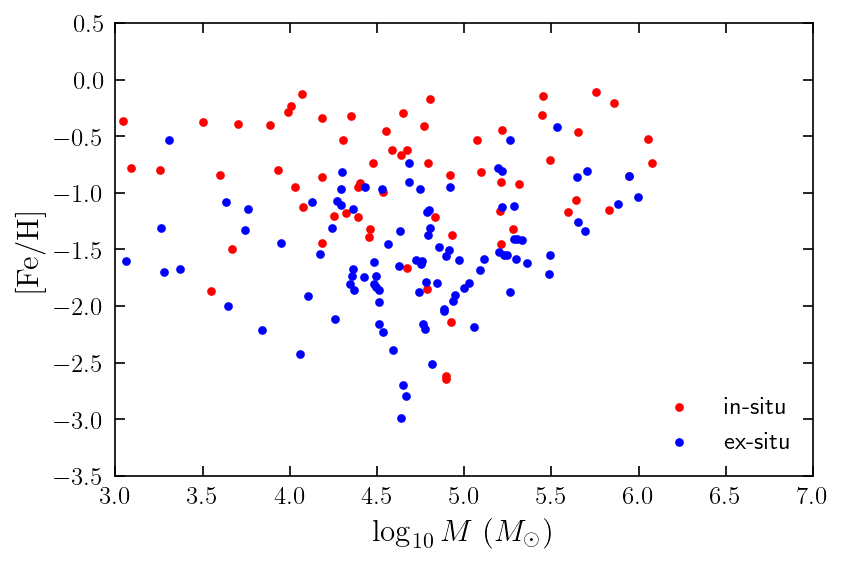

In [6]:
hid = 506151

# select survived clusters
idx_in = np.where((data_s['origin'] < 0) & (data_s['halo_id'] == hid))[0]
idx_ex = np.where((data_s['origin'] > 0) & (data_s['halo_id'] == hid))[0]

# plot clusters formed in-situ (in the central halo) as red
plt.scatter(data_s['log_m_gc'][idx_in], data_s['feh'][idx_in], fc='r', s=10, label='in-situ')

# plot clusters formed ex-situ (in satellite galaxies) as blue
plt.scatter(data_s['log_m_gc'][idx_ex], data_s['feh'][idx_ex], fc='b', s=10, label='ex-situ')

plt.xlabel(r'$\log_{10} M\ (M_\odot)$')
plt.ylabel(r'$\rm [Fe/H]$')
plt.xlim(3, 7)
plt.ylim(-3.5, 0.5)
plt.legend(loc='lower right');

And the metallicity of disrupted clusters vs. their initial mass, which gives an estimate of the stellar stream:

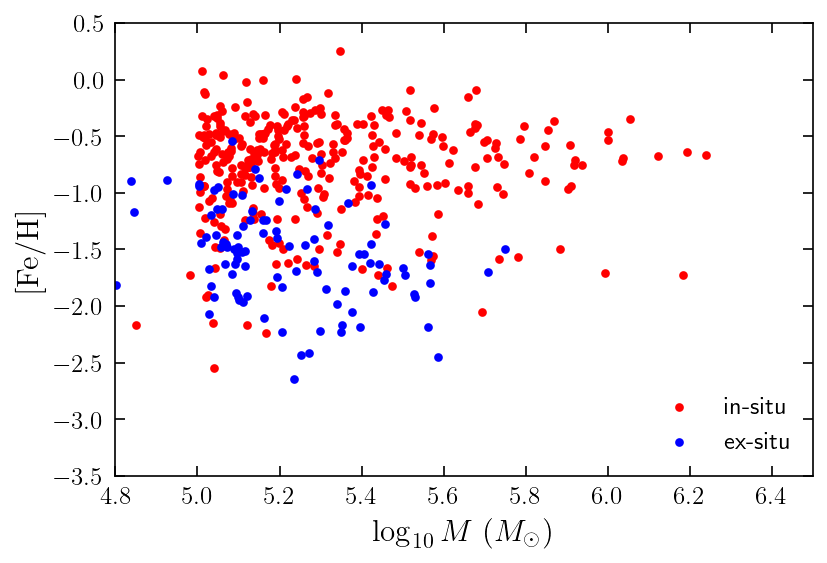

In [7]:
# select survived clusters
idx_in = np.where((data_d['origin'] < 0) & (data_d['halo_id'] == hid))[0]
idx_ex = np.where((data_d['origin'] > 0) & (data_d['halo_id'] == hid))[0]

# plot clusters formed in-situ (in the central halo) as red
plt.scatter(data_d['log_m_form'][idx_in], data_d['feh'][idx_in], fc='r', s=10, label='in-situ')

# plot clusters formed ex-situ (in satellite galaxies) as blue
plt.scatter(data_d['log_m_form'][idx_ex], data_d['feh'][idx_ex], fc='b', s=10, label='ex-situ')

plt.xlabel(r'$\log_{10} M\ (M_\odot)$')
plt.ylabel(r'$\rm [Fe/H]$')
plt.xlim(4.8, 6.5)
plt.ylim(-3.5, 0.5)
plt.legend(loc='lower right');